In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
train_data = pd.read_csv('Train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train_data.drop(['Item_Identifier','Outlet_Identifier'],axis = 1 , inplace = True)

In [7]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
## Seperation of the character variable and numerical variable

In [10]:
character_feature = [fea for fea in train_data.columns if train_data[fea].dtypes=='O']

In [11]:
character_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
numerical_feature = [fea for fea in train_data.columns if train_data[fea].dtypes!='O']

In [13]:
numerical_feature

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [14]:
## Target feature is Item_outlet_sales

# Univariate Analysis

# Numerical Feature

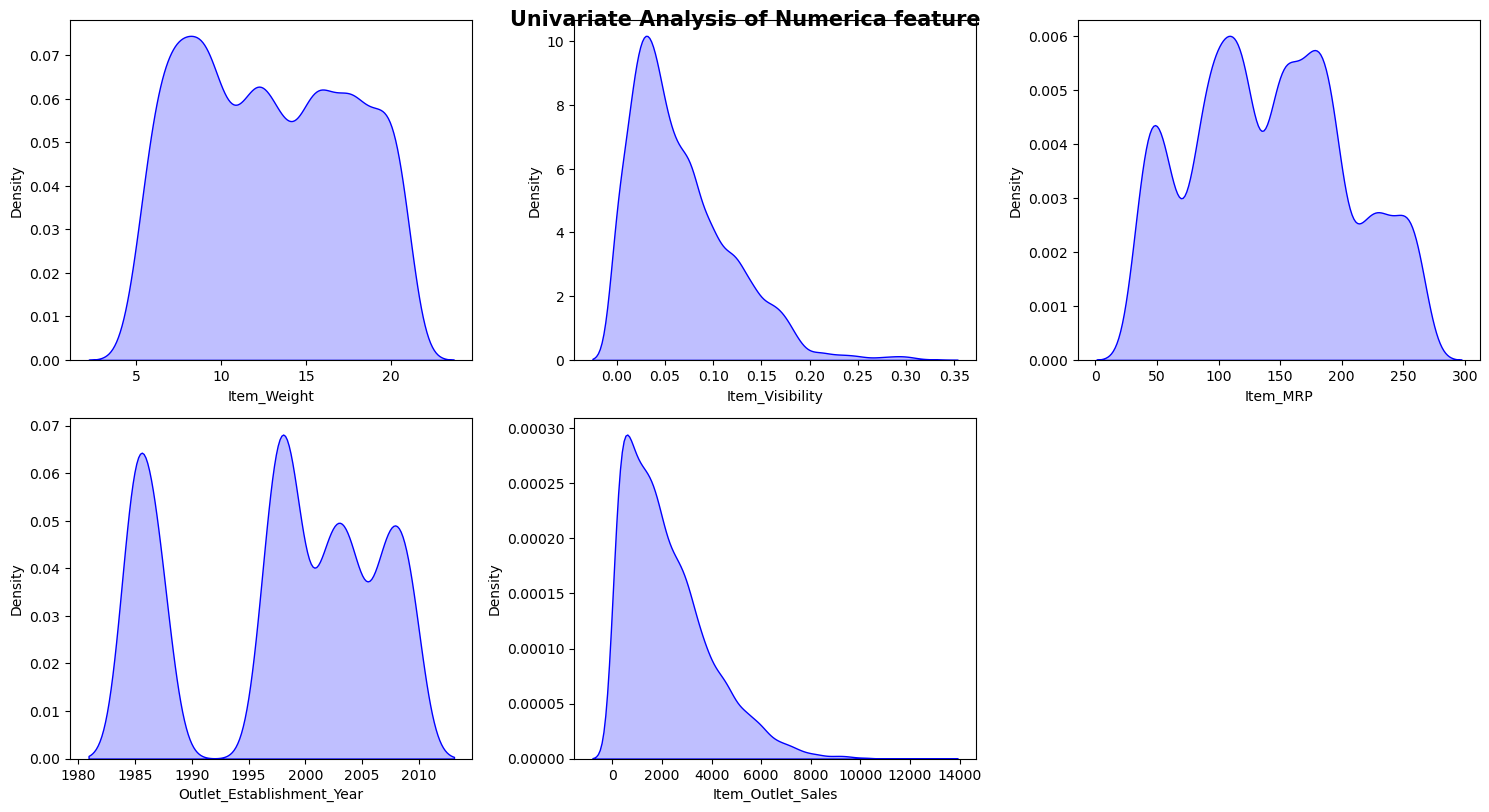

In [15]:
plt.figure(figsize=(15,20))
plt.suptitle("Univariate Analysis of Numerica feature",fontsize=15,fontweight='bold')
for i in range(0,len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=train_data[numerical_feature[i]],shade=True,color='b',data = train_data)
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [16]:
#Insight

#Item Visibility  and Item_Outket_Sales tilt toward right and is right skewed

# Character Feature

In [17]:
character_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

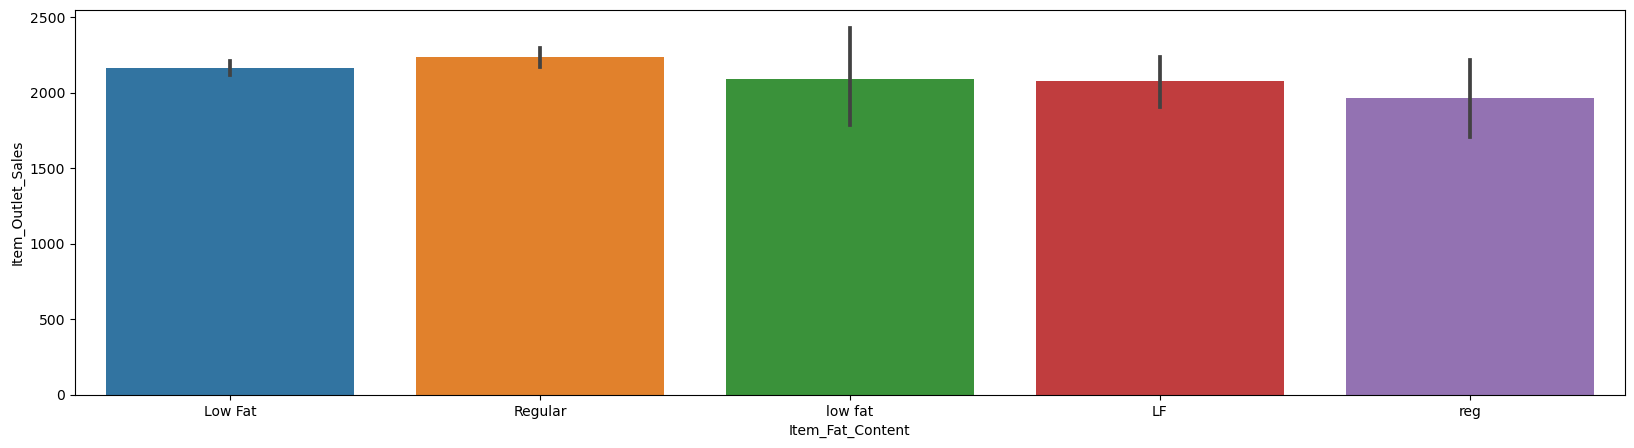

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train_data)
plt.show()

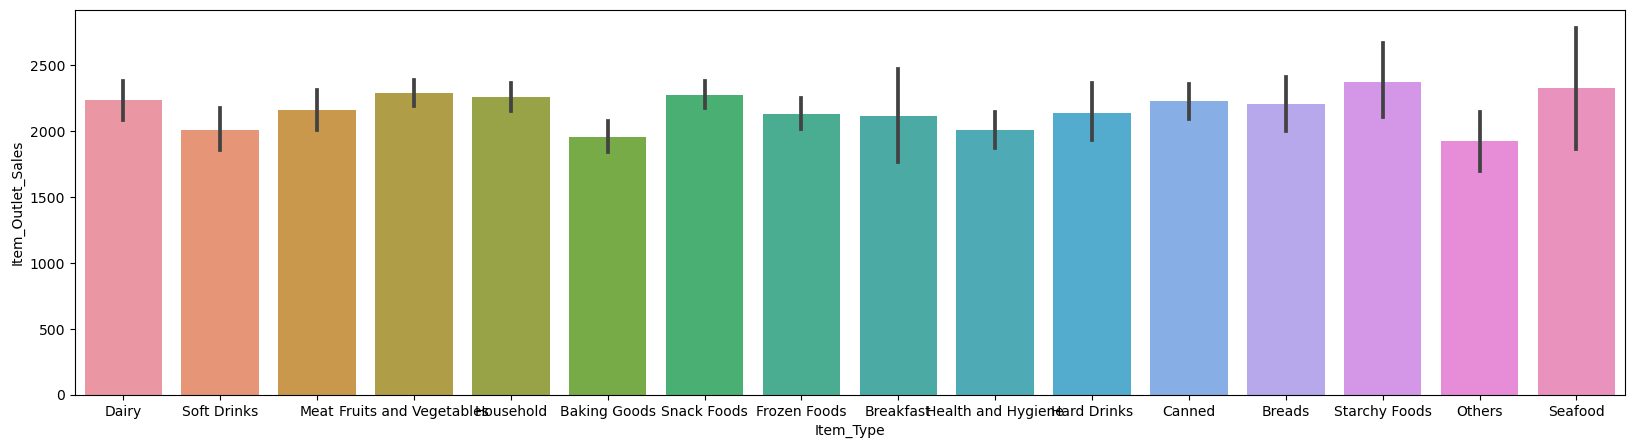

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train_data)
plt.show()

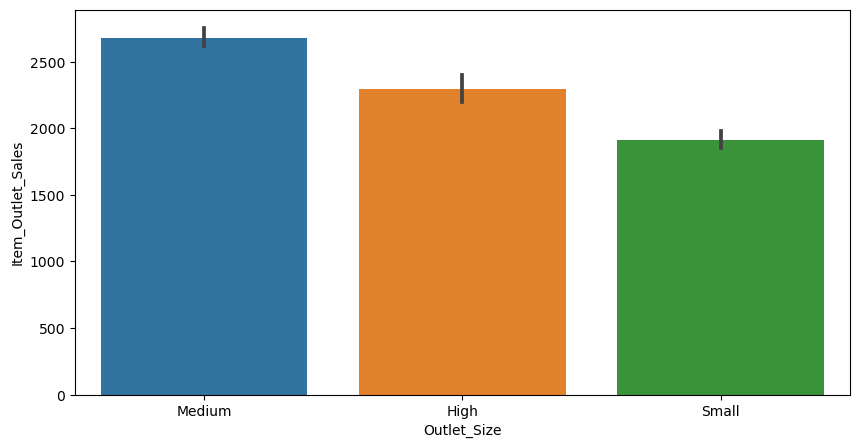

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_data)
plt.show()

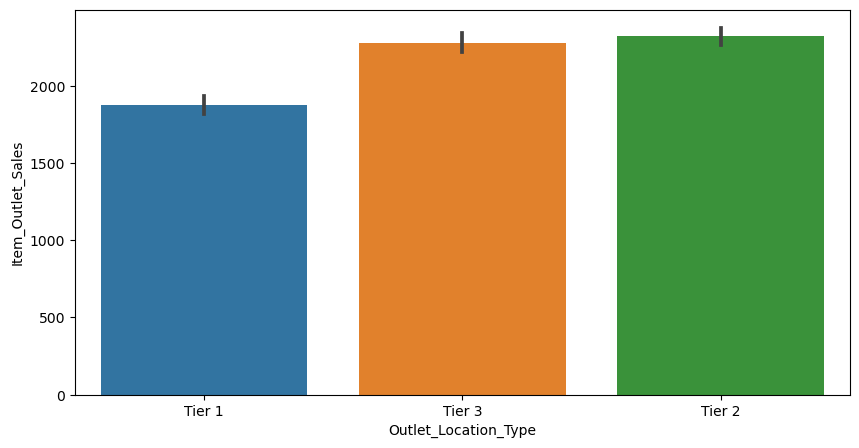

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train_data)
plt.show()

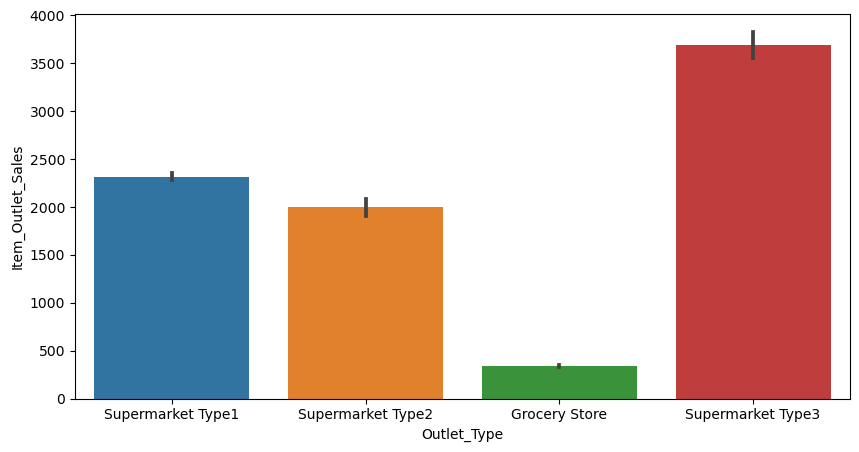

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_data)
plt.show()

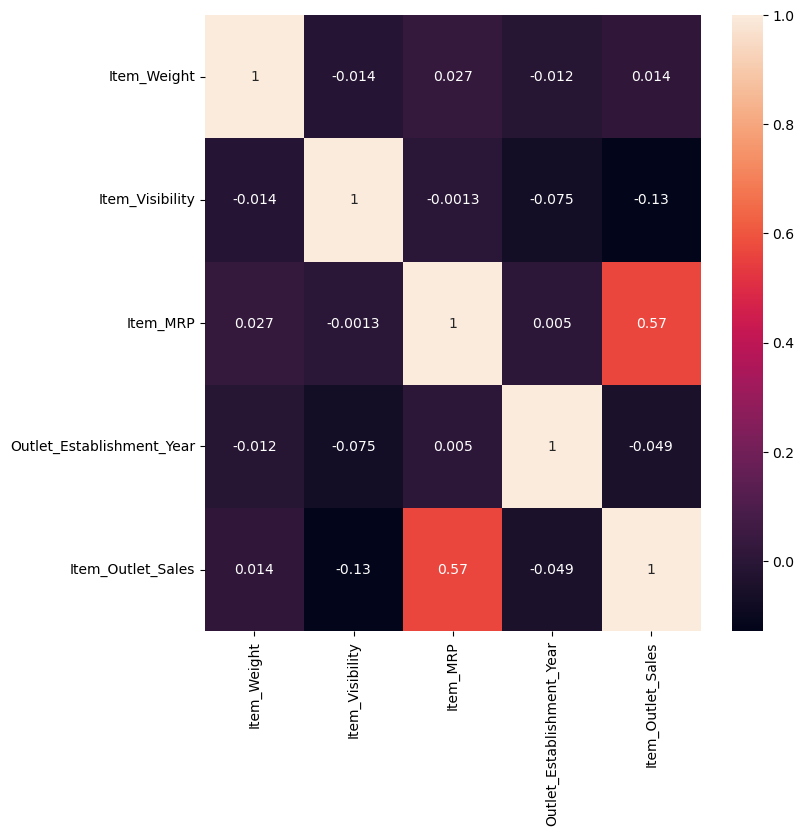

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(data=train_data.corr(), annot=True)
plt.show()

In [24]:
## Accordin to the data , it show that dataset has very less correlation or negative

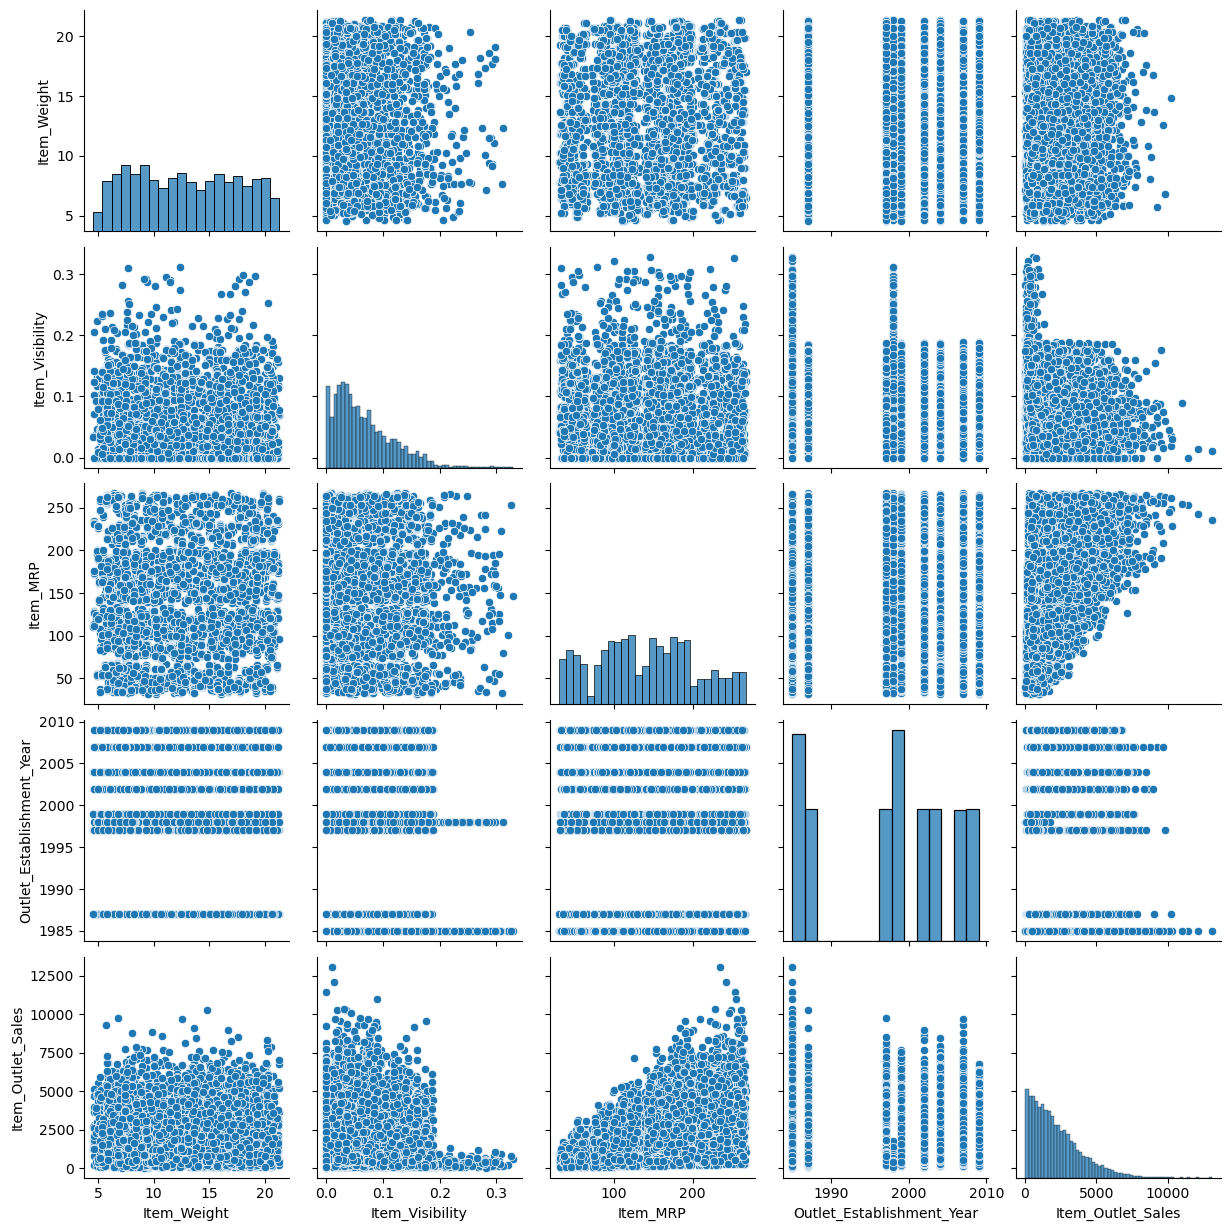

In [25]:
sns.pairplot(train_data)

# Statistic 

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [27]:
train_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
train_data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [29]:
train_data["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [30]:
train_data["Item_Weight"] = train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean())

In [31]:
train_data["Item_Weight"].unique().sum()

4006.6576451841365

In [32]:
train_data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [34]:
Mode = train_data['Outlet_Size'].mode()
Mode

0    Medium
Name: Outlet_Size, dtype: object

In [35]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [36]:
train_data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
mode_of_outlet_size = train_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [38]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [39]:
miss_value=train_data['Outlet_Size'].isnull()

In [40]:
print(miss_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [41]:
train_data.dropna()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,reg,0.083607,Frozen Foods,178.8318,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [42]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [43]:
miss_values=train_data['Outlet_Size'].isnull() 

In [44]:
train_data.loc[miss_values, 'Outlet_Size'] = train_data.loc[miss_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [45]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [46]:
train_data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [47]:
## Outliers in the data

In [48]:
import warnings
warnings.filterwarnings('ignore')

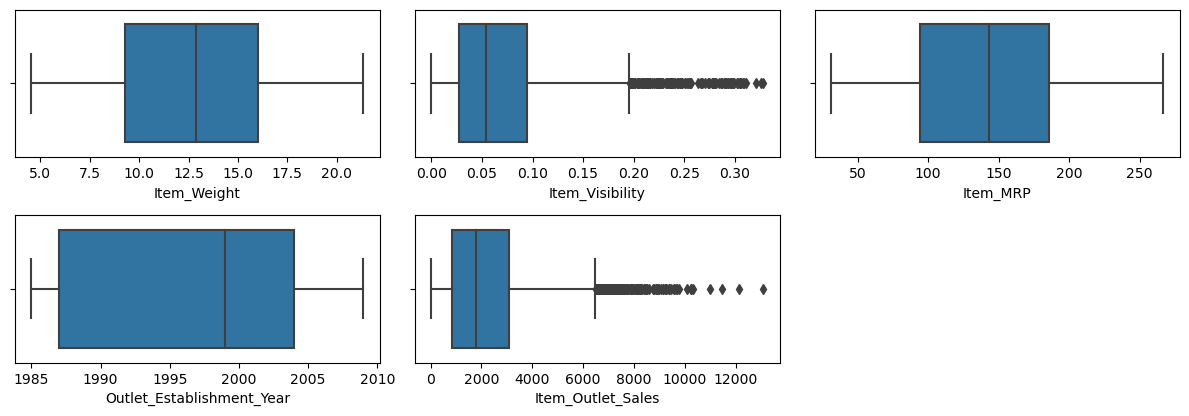

In [49]:
plt.figure(figsize =(12,10))
for i in range (0, len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.boxplot(train_data[numerical_feature[i]])
    plt.tight_layout()

In [50]:
## According to this  , It show that Item_Visibility and Item_Outlet_sales have outliers

In [51]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

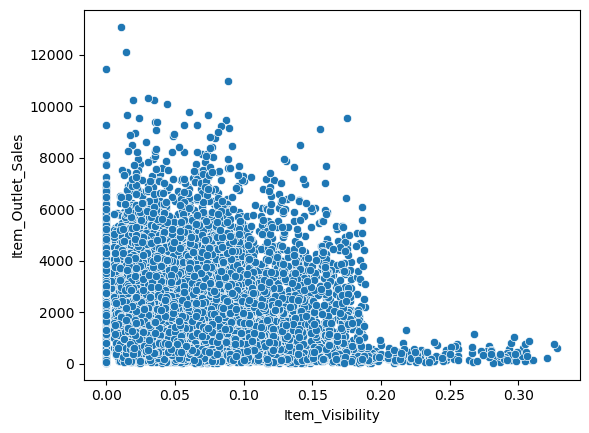

In [52]:
sns.scatterplot(x = "Item_Visibility",y ='Item_Outlet_Sales' , data = train_data )

In [53]:
def outlier_threshold(dataframe,variable):
    quantile1 = dataframe[variable].quantile(0.25)
    quantile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3+1.5*interquantile_range
    lower_limit = quantile1-1.5*interquantile_range
    return up_limit , lower_limit

In [54]:
def replcae_with_outliers(dataframe,numerical_columns):
    for variable in numerical_columns:
        up_limit , lower_limit = outlier_threshold(dataframe,variable)
        dataframe.loc[(dataframe[variable]<lower_limit),variable] = lower_limit
        dataframe.loc[(dataframe[variable]>up_limit),variable] = up_limit

In [55]:
replcae_with_outliers(train_data,numerical_feature)

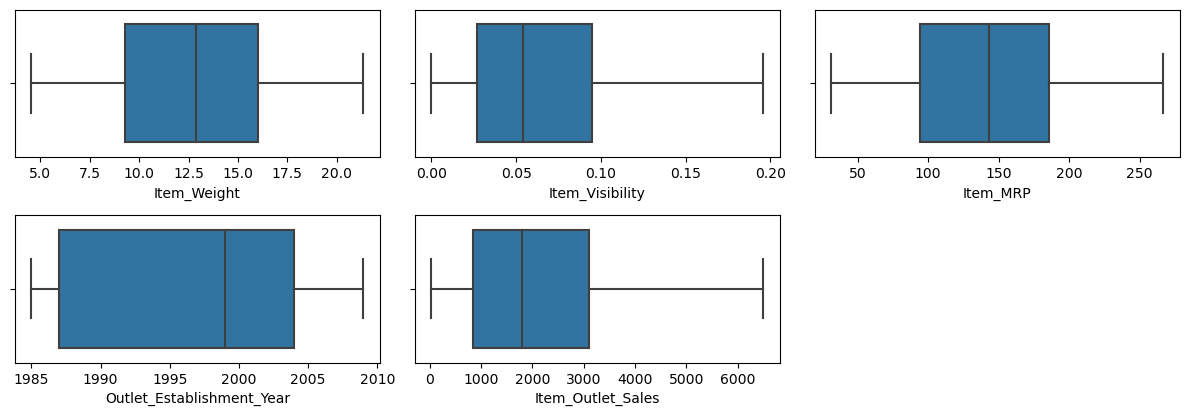

In [56]:
plt.figure(figsize =(12,10))
for i in range (0, len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.boxplot(train_data[numerical_feature[i]])
    plt.tight_layout()

In [57]:
## Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
character_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [61]:
train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type'] = le.fit_transform(train_data['Item_Type'])
train_data['Outlet_Size'] = le.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = le.fit_transform(train_data['Outlet_Type'])

In [62]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999.0,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009.0,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999.0,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998.0,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987.0,0,2,1,994.7052


In [63]:
## Test data

In [64]:
test_data = pd.read_csv('Test.csv')
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [66]:
test_data.drop(['Item_Identifier','Outlet_Identifier'],axis = 1 , inplace = True)

In [67]:
test_data.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [68]:
test_data["Item_Weight"] = test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean())

In [69]:
test_data.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [70]:
test_data['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [71]:
miss_values=test_data['Outlet_Size'].isnull() 

In [72]:
test_data.loc[miss_values, 'Outlet_Size'] = test_data.loc[miss_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [73]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [74]:
t_numerical_feature = [fea for fea in test_data.columns if test_data[fea].dtype!='O']
t_categorical_feature = [fea for fea in test_data.columns if test_data[fea].dtype=='O']

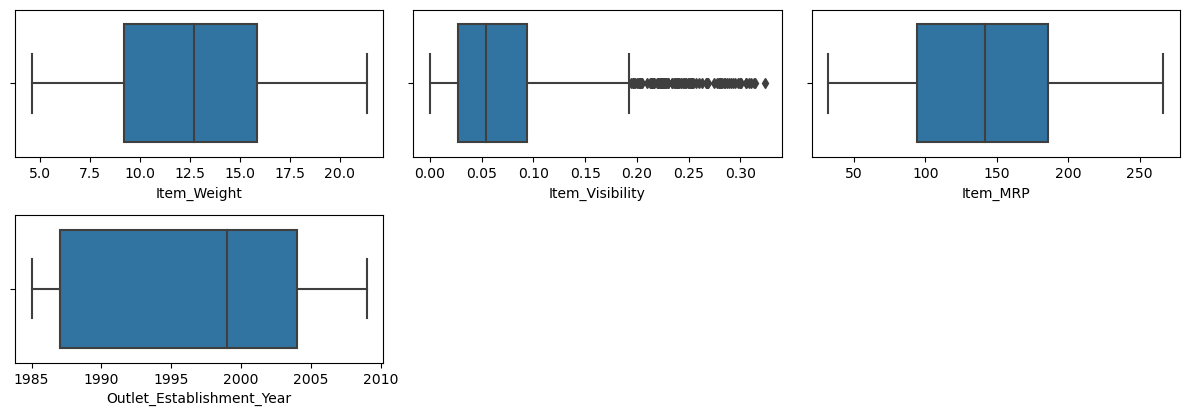

In [75]:
plt.figure(figsize =(12,10))
for i in range (0, len(t_numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.boxplot(test_data[t_numerical_feature[i]])
    plt.tight_layout()

In [76]:
def outlier_threshold(dataframe,variable):
    quantile1 = dataframe[variable].quantile(0.25)
    quantile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3+1.5*interquantile_range
    lower_limit = quantile1-1.5*interquantile_range
    return up_limit , lower_limit

In [77]:
def replcae_with_outliers(dataframe,numerical_columns):
    for variable in numerical_columns:
        up_limit , lower_limit = outlier_threshold(dataframe,variable)
        dataframe.loc[(dataframe[variable]<lower_limit),variable] = lower_limit
        dataframe.loc[(dataframe[variable]>up_limit),variable] = up_limit

In [78]:
replcae_with_outliers(test_data,t_numerical_feature)

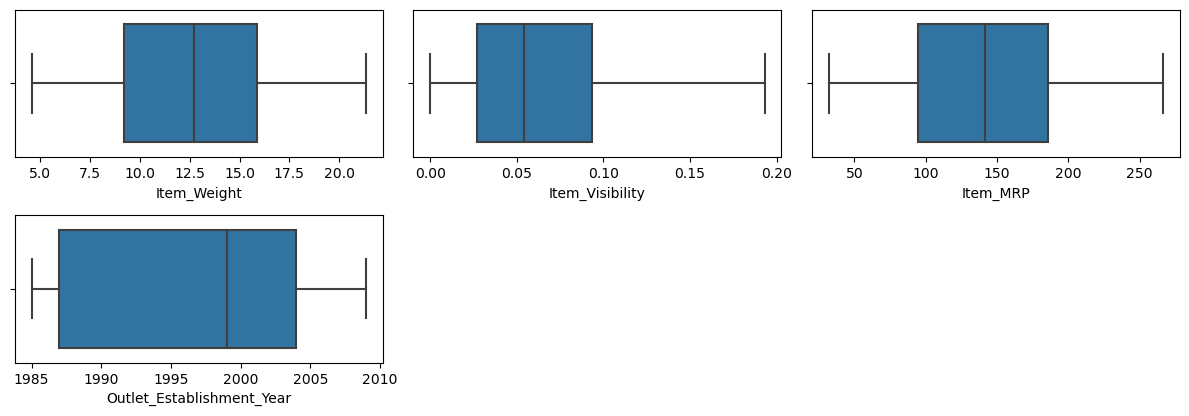

In [79]:
plt.figure(figsize =(12,10))
for i in range (0, len(t_numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.boxplot(test_data[t_numerical_feature[i]])
    plt.tight_layout()

In [80]:
t_categorical_feature

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [81]:
## Label Encoder

In [82]:
test_data['Item_Fat_Content'] = le.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type'] = le.fit_transform(test_data['Item_Type'])
test_data['Outlet_Size'] = le.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type'] = le.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = le.fit_transform(test_data['Outlet_Type'])

In [83]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999.0,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007.0,2,1,1
2,14.600000,1,0.099575,11,241.7538,1998.0,2,2,0
3,7.315000,1,0.015388,13,155.0340,2007.0,2,1,1
4,12.695633,2,0.118599,4,234.2300,1985.0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997.0,2,0,1
5677,7.600000,2,0.142991,15,169.1448,2009.0,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002.0,2,1,1
5679,15.300000,2,0.000000,3,214.6218,2007.0,2,1,1


In [84]:
train_data.shape

(8523, 10)

In [85]:
train_data.to_csv('Final_data.csv')

In [86]:
df=pd.read_csv('Final_data.csv')

df.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,1,0.016047,4,249.8092,1999.0,1,0,1,3735.1380
1,1,5.92,2,0.019278,14,48.2692,2009.0,1,2,2,443.4228
2,2,17.50,1,0.016760,10,141.6180,1999.0,1,0,1,2097.2700
3,3,19.20,2,0.000000,6,182.0950,1998.0,2,2,0,732.3800
4,4,8.93,1,0.000000,9,53.8614,1987.0,0,2,1,994.7052


In [87]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [88]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999.0,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009.0,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999.0,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998.0,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987.0,0,2,1,994.7052


In [91]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999.0,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009.0,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999.0,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998.0,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987.0,0,2,1,994.7052


In [92]:
## Preprocessing and Scalling of the Data

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [94]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [95]:
X = df.iloc[:,:-1]

In [96]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1999.0,1,0,1
1,5.920,2,0.019278,14,48.2692,2009.0,1,2,2
2,17.500,1,0.016760,10,141.6180,1999.0,1,0,1
3,19.200,2,0.000000,6,182.0950,1998.0,2,2,0
4,8.930,1,0.000000,9,53.8614,1987.0,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987.0,0,2,1
8519,8.380,2,0.046982,0,108.1570,2002.0,2,1,1
8520,10.600,1,0.035186,8,85.1224,2004.0,2,1,1
8521,7.210,2,0.145221,13,103.1332,2009.0,1,2,2


In [97]:
y = df['Item_Outlet_Sales']

In [98]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [99]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [100]:
sc = StandardScaler()

In [101]:
sc.fit(X_train)

StandardScaler()

In [102]:
X_train_tf = sc.transform(X_train)

In [103]:
X_test_tf = sc.transform(X_test)

In [104]:
## Model Building

# Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
reg = LinearRegression()

In [107]:
reg

LinearRegression()

In [108]:
reg.fit(X_train_tf,y_train)

LinearRegression()

In [109]:
print(reg.coef_)

[  -5.11024825   20.3929696   -78.57909923   -1.66191105  936.98701997
   39.6795141  -112.97650538 -247.74694723  711.71008844]


In [110]:
print(reg.intercept_)

2162.172522542373


In [111]:
reg_pred = reg.predict(X_test_tf)
reg_pred

array([1017.12087202,  726.83833495,  965.21910465, 4049.99734001,
       2906.15845449,  790.46636152, 4422.31401116, 2845.73757405,
       2213.42194757, 3568.186583  ,  214.97393386, 2946.62311596,
       3507.22630326,  643.58153505,  908.70634364, 3808.54617872,
       1504.09046827, 1341.69643803, 2094.73773139, 2947.4323059 ,
       2841.32640059, 2272.06825014, 2555.25769327, 2547.82841147,
       3692.37176675, 2209.07051083, 1228.59636047, 3841.89257572,
       2709.65393209, 3791.77945678,  831.6416792 , 2698.65353051,
       1831.74285971, 2683.11733535, 1552.48370779, 1135.91786959,
        624.40914957, 1569.93745802,  991.10618294, 2909.49930427,
       -395.45396076, 1730.93483102, 1296.06745069, 1151.45329098,
       2177.06752159, 1120.34590985,  666.06093939,  938.77978902,
       3689.65691507, 2036.54790702,  666.25018505, 2001.77116445,
       1112.77627861, -146.32487547,  807.05267614, 1559.11199936,
       2722.76665268, 1755.34834906,  830.94484368, 3495.90698

Text(0, 0.5, 'reg_pred')

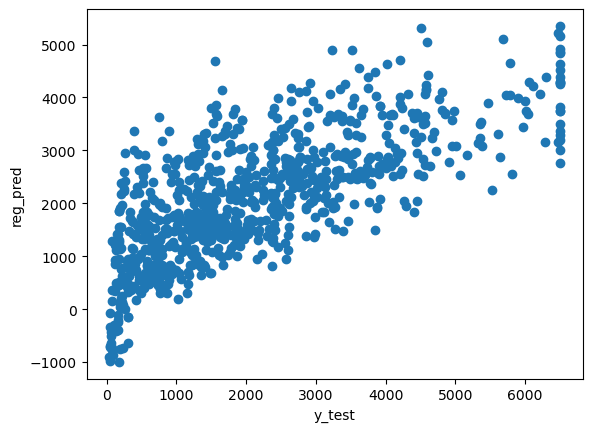

In [112]:
plt.scatter(y_test,reg_pred)
plt.xlabel("y_test")
plt.ylabel("reg_pred")

In [113]:
residuals  = y_test - reg_pred
residuals

7503     725.943528
2957    -369.969535
7031    -587.710505
1084    1728.480860
856     -549.226454
           ...     
7118    2753.048586
7364    1315.926269
4128     422.958085
6440     -26.638657
2688     336.755112
Name: Item_Outlet_Sales, Length: 853, dtype: float64

In [114]:
residuals.mean()

9.587353599416423

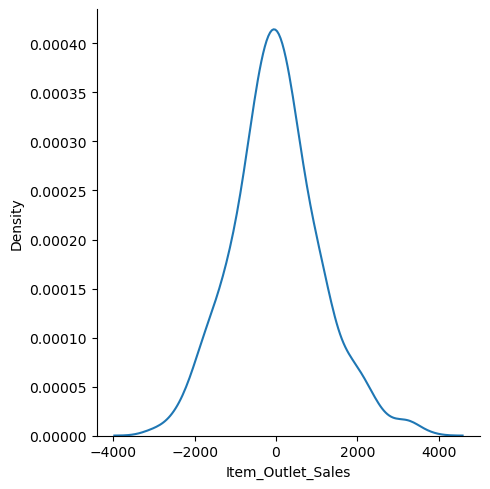

In [115]:
sns.displot(residuals , kind="kde")

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test , reg_pred)))

1172288.052145648
830.6286132540723
1082.7225185363275


In [117]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.5369069200511253


# Ridge Regression

In [118]:
from sklearn.linear_model import Ridge

In [119]:
ridge_reg = Ridge()

In [120]:
ridge_reg

Ridge()

In [121]:
ridge_reg.fit(X_train_tf,y_train)

Ridge()

In [122]:
print(ridge_reg.coef_)

[  -5.10777737   20.3918367   -78.5922036    -1.6581728   936.86447506
   39.65866439 -112.95722924 -247.64312718  711.57127753]


In [123]:
print(ridge_reg.intercept_)

2162.172522542373


In [124]:
reg_pred = ridge_reg.predict(X_test_tf)
reg_pred

array([1017.38720131,  726.93933132,  965.29385967, 4049.76285408,
       2906.08248623,  790.56835386, 4421.98001763, 2845.68629237,
       2213.43668809, 3568.03298566,  215.3960331 , 2946.51562756,
       3507.05854259,  643.90557293,  908.79670276, 3808.3240494 ,
       1504.16148645, 1341.77274284, 2094.65466479, 2947.29325602,
       2841.23572846, 2272.16509965, 2555.21535181, 2547.68427736,
       3692.13135965, 2209.08887086, 1228.65977228, 3841.61039412,
       2709.58205526, 3791.47620797,  831.72504007, 2698.49519496,
       1831.74221684, 2683.06469202, 1552.56146499, 1136.18240987,
        624.62924625, 1569.98923148,  991.25868696, 2909.35141705,
       -395.03655385, 1730.9872498 , 1296.19263935, 1151.65741282,
       2177.07051378, 1120.46543643,  666.27105636,  938.87272031,
       3689.45669442, 2036.50630268,  666.4650875 , 2001.90850743,
       1112.81522434, -146.05011583,  807.11998584, 1559.18060202,
       2722.67868157, 1755.50128198,  831.01216821, 3495.73083

Text(0, 0.5, 'reg_pred1')

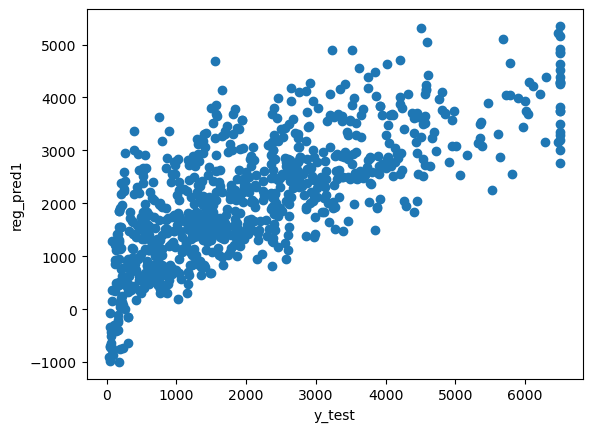

In [125]:
plt.scatter(y_test,reg_pred)
plt.xlabel("y_test")
plt.ylabel("reg_pred1")

In [126]:
residuals  = y_test - reg_pred
residuals

7503     725.677199
2957    -370.070531
7031    -587.785260
1084    1728.715346
856     -549.150486
           ...     
7118    2753.317664
7364    1316.078759
4128     422.834519
6440     -26.682473
2688     336.760925
Name: Item_Outlet_Sales, Length: 853, dtype: float64

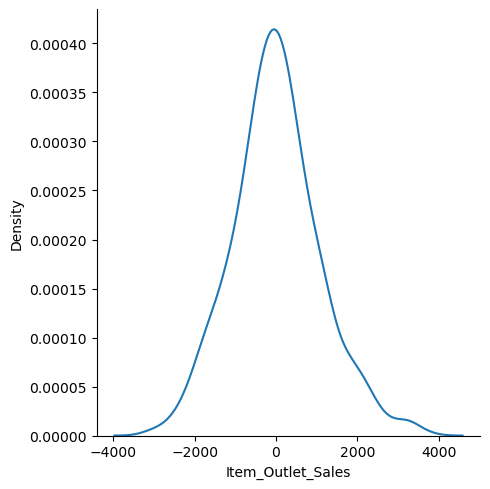

In [127]:
sns.displot(residuals , kind="kde")

In [128]:
residuals.mean()

9.581572028841121

In [129]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test,reg_pred)
print(score1)

0.536905019756945


# Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rf = RandomForestRegressor(n_estimators = 1000)
print(rf)

RandomForestRegressor(n_estimators=1000)


In [132]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [133]:
rf_pred = rf.predict(X_test)
rf_pred

array([ 724.110764 ,  911.4928502,  743.0581004, 4528.8385129,
       2397.3074436,  446.7864216, 5192.5202702, 1666.573967 ,
       1266.2211032, 2992.4833744,  258.8557162,  567.8448408,
       4767.567428 ,  769.5442902,  869.9988626, 4439.5217758,
       1444.1202   , 1544.8197868, 2568.4140488, 3709.6917898,
       2840.3144515, 2843.6544372, 3114.472582 , 2550.623207 ,
       2908.9860622, 1013.287678 ,  224.3419758, 4168.5811238,
       3671.8999831, 3786.5071332,  636.7937572, 2888.2627043,
       2404.2384216, 3094.6870034,  372.2241454, 1364.2022286,
        779.0199558, 2115.5621892, 1545.704635 , 2234.4241342,
        197.892405 , 1783.9971182, 1080.886352 , 1511.8993058,
       2418.6729656, 1429.6843244,  772.937207 ,  960.6308876,
       4085.7189848, 1876.8296122,  849.9975648, 2019.567811 ,
        842.0166202,  222.0616108,  635.7897308, 1989.936382 ,
       2816.3836021, 1556.763573 ,  681.5468358, 4113.7038904,
        837.5657472,  375.0997356, 2703.1786268, 2187.4

In [134]:
residuals  = y_test - rf_pred
residuals

7503    1018.953636
2957    -554.624050
7031    -365.549500
1084    1249.639687
856      -40.375444
           ...     
7118    2082.344096
7364    1624.691152
4128      38.906689
6440     346.056208
2688     357.330199
Name: Item_Outlet_Sales, Length: 853, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

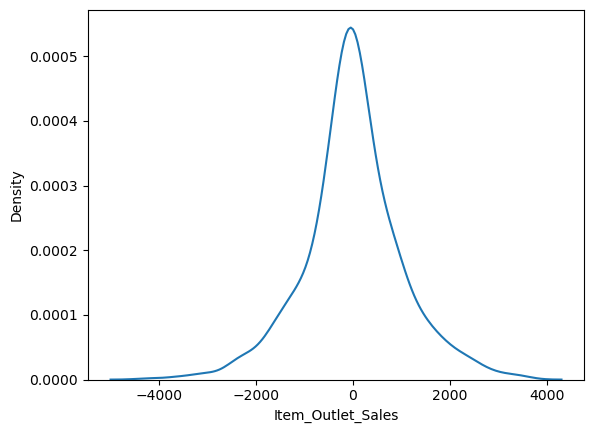

In [135]:
sns.kdeplot(residuals)

In [136]:
from sklearn.metrics import r2_score
score = r2_score(y_test,rf_pred)
print(score)

0.5943032702024973


# Support Vector Machine 

In [137]:
from sklearn.svm import SVR

In [138]:
reg_svr=SVR()

In [139]:
reg_svr

SVR()

In [140]:
reg_svr.fit(X_train_tf,y_train)

SVR()

In [141]:
svr_pred = reg_svr.predict(X_test_tf)

In [142]:
svr_pred

array([1728.49135043, 1482.60669464, 1549.07312956, 2032.54518346,
       1992.5314662 , 1564.02013632, 2051.58848172, 1853.02392346,
       1737.02119932, 1983.90702004, 1560.80725852, 1763.25705138,
       2060.44696563, 1692.55380905, 1492.94270218, 2070.64998653,
       1695.09484368, 1648.13300934, 1749.87302995, 1944.01779916,
       1806.27016008, 1876.13124297, 1887.74662157, 1849.01625841,
       1986.81023594, 1825.92149339, 1597.72051383, 2006.70880896,
       1936.33306889, 2016.47021036, 1497.80974446, 1858.35220623,
       1742.84905772, 1962.03251197, 1719.50007278, 1743.1529598 ,
       1566.48141498, 1694.23874451, 1556.52320307, 1891.81595352,
       1575.35269925, 1756.27099648, 1699.01985988, 1735.79704262,
       1833.05256285, 1606.32916895, 1522.31340728, 1579.15690207,
       2131.8857095 , 1724.90442154, 1602.91522069, 1858.23183361,
       1573.22339828, 1429.74750825, 1578.49455174, 1691.92125137,
       1948.15248014, 1799.60320487, 1536.88989774, 2056.56864

In [143]:
from sklearn.metrics import r2_score
score = r2_score(y_test,svr_pred)
print(score)

0.10409746828484367


In [144]:
#Decision Tree

In [145]:
from sklearn.tree import DecisionTreeRegressor

In [146]:
dt_reg = DecisionTreeRegressor()

In [147]:
dt_reg

DecisionTreeRegressor()

In [148]:
dt_reg.fit(X_train_tf,y_train)

DecisionTreeRegressor()

In [149]:
dt_pred = dt_reg.predict(X_test_tf)

In [150]:
dt_pred

array([ 934.7832, 1537.998 , 1216.4166, 5000.8238,  982.055 ,  466.06  ,
       5289.1152, 1679.1476, 1872.2296, 2182.4924,  205.0664,  759.012 ,
       5896.3248,  777.6544, 1118.544 , 3934.878 , 1267.0174, 3219.8088,
       3475.476 , 3426.2068, 2656.542 , 4530.1032, 2261.0568, 3611.2992,
       2366.919 , 1012.016 ,  153.7998, 5954.9152, 4247.804 , 5191.2426,
       1198.44  , 3593.3226, 1985.4156, 3146.5708,  449.415 , 1868.2348,
        679.116 , 2450.144 , 2277.036 , 3123.9336,   87.2198, 2530.04  ,
        543.2928, 2628.5784, 3563.3616, 1258.362 ,  848.895 ,  768.999 ,
       5849.7188, 1583.9382,  145.8102, 1589.2646,  343.5528,  218.3824,
        656.4788, 2664.5316, 2740.4328, 1557.972 ,  521.9872, 5313.7498,
        458.0704,  164.4526, 3795.06  , 2332.2974, 2940.1728, 1823.6262,
        645.1602, 2890.9036,  892.172 ,  788.973 ,  619.194 ,  300.9416,
       5849.7188, 3672.5528,  201.0716,  451.4124, 3494.1184, 1860.2452,
       3175.866 , 1416.8224, 1348.245 , 3611.2992, 

In [151]:
from sklearn.metrics import r2_score
score = r2_score(y_test,dt_pred)
print(score)

0.22861709530708207


In [152]:
##Hyper parameter tuning

In [153]:
##hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_tf, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.561 using {'n_estimators': 1000}
0.516 (0.008) with: {'n_estimators': 10}
0.557 (0.002) with: {'n_estimators': 100}
0.561 (0.005) with: {'n_estimators': 1000}


In [154]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [155]:
grid_search_forest.best_score_

0.5605401015869811

In [156]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_tf)

In [157]:
r2_score(y_test,Y_pred_rf_grid)

0.595914304986038

In [158]:
## XGBoost

In [159]:
from xgboost import XGBRegressor

In [160]:
XG_regressor = XGBRegressor()

In [161]:
XG_regressor.fit(X_train_tf, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [162]:
XG_pred = XG_regressor.predict(X_test_tf)

In [163]:
from sklearn.metrics import r2_score
score = r2_score(y_test,XG_pred)
print(score)

0.5869502928428132


In [164]:
## Saving The Model

In [165]:
import pickle
with open('randomforest','wb') as f:
    pickle.dump(grid_search_forest,f)

In [166]:
with open('randomforest','rb') as f:
    ob=pickle.load(f)

In [167]:
ob.predict(X_test_tf)

array([ 714.373439 ,  918.0170244,  722.4436008, 4520.9401275,
       2323.691935 ,  441.2669396, 5136.5501261, 1763.4425406,
       1252.2406348, 2996.8417012,  259.4982132,  572.8416698,
       4711.9218614,  757.9147616,  862.2030104, 4535.9439305,
       1440.148703 , 1548.6654476, 2584.875288 , 3711.5946462,
       2858.2208096, 2793.4664332, 3050.519163 , 2627.573042 ,
       2943.3576543, 1013.9195222,  226.3939714, 4253.0062283,
       3694.4170062, 3782.0083226,  646.9225726, 2845.1681335,
       2403.6385358, 3085.3261883,  373.3533422, 1330.8489776,
        788.6287814, 2064.0206138, 1555.3507454, 2272.9962585,
        194.6359772, 1808.7662098, 1063.469024 , 1481.4456138,
       2376.2408658, 1443.2526626,  775.6609948,  980.9744066,
       4157.9492965, 1880.775143 ,  863.1784074, 2062.2702256,
        871.9709622,  222.2253976,  651.4373624, 1993.2360868,
       2867.5676429, 1545.0514852,  674.0712334, 4141.3162809,
        829.4389924,  358.0952036, 2725.132716 , 2140.2